In [1]:
# Basic models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
#Importing datasets
train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')

In [3]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
# Setting test data rows 'revenue' column to -1 for future referance

test['revenue'] = -1

In [7]:
#Joining Test and Train to preprocess

complete = pd.concat([train,test],axis =0, sort=False, ignore_index=True)

In [8]:
complete.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [9]:
print(complete.shape, train.shape, test.shape)

(7398, 23) (3000, 23) (4398, 23)


##### Extracting info we need from JSON formatted columns

#### 1. Firstly filling all null values with a string :[{}]
#### 2. Initializing a list

#### 3. Iterating through the coulmn and converting it into an object using ast 
#### 4. Now that it is converted into a dictionary, we extract the values of the key 'name'

In [10]:
import ast

In [11]:
complete.belongs_to_collection=complete.belongs_to_collection.fillna('[{}]')

belongs_to_collectionList=[]
for index,row in complete.belongs_to_collection.iteritems():
    belongs_to_collectionStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            belongs_to_collectionStr=belongs_to_collectionStr+';'+dic['name'] 
            
    belongs_to_collectionStr=belongs_to_collectionStr.strip(';') # trim leading ;
    belongs_to_collectionList.append(belongs_to_collectionStr)
    
tempDF=pd.DataFrame(belongs_to_collectionList,columns=['belongs_to_collection'])
complete.belongs_to_collection=tempDF['belongs_to_collection']

In [12]:
complete.belongs_to_collection.value_counts().head()

                              5917
James Bond Collection           26
Friday the 13th Collection      12
Pokémon Collection               9
Halloween Collection             8
Name: belongs_to_collection, dtype: int64

In [13]:
complete.belongs_to_collection.head()

0    Hot Tub Time Machine Collection
1    The Princess Diaries Collection
2                                   
3                                   
4                                   
Name: belongs_to_collection, dtype: object

In [14]:
#Extracting genres

complete.genres=complete.genres.fillna('[{}]')

genresList=[]
for index,row in complete.genres.iteritems():
    genresStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            genresStr=genresStr+';'+dic['name'] 
    genresStr=genresStr.strip(';') # trim leading ;
    genresList.append(genresStr)
    
tempDF=pd.DataFrame(genresList,columns=['genres'])
complete.genres=tempDF['genres']

In [15]:
complete

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,,8000000,Animation;Adventure;Family,NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,,14000000,Horror;Thriller,http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,,0,Documentary,NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,The Muppet Collection,0,Action;Comedy;Music;Family;Adventure,NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
9,10,,6000000,Comedy;Music,NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wi

In [16]:
# Extracting production companies

complete.production_companies=complete.production_companies.fillna('[{}]')

production_companiesList=[]
for index,row in complete.production_companies.iteritems():
    production_companiesStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            production_companiesStr=production_companiesStr+';'+dic['name'] 
    production_companiesStr=production_companiesStr.strip(';') # trim leading ;
    production_companiesList.append(production_companiesStr)
    
tempDF=pd.DataFrame(production_companiesList,columns=['production_companies'])
complete.production_companies=tempDF['production_companies']

In [17]:
complete.production_companies

0       Paramount Pictures;United Artists;Metro-Goldwy...
1                                    Walt Disney Pictures
2       Bold Films;Blumhouse Productions;Right of Way ...
3                                                        
4                                                        
5                                                        
6              Ghost House Pictures;North Box Productions
7                                                        
8       Walt Disney Pictures;Jim Henson Productions;Ji...
9                               Castle Rock Entertainment
10                                         United Artists
11      Twentieth Century Fox Film Corporation;Amercen...
12                     DreamWorks SKG;Jinks/Cohen Company
13      Double Feature Films;Jersey Films;Nina Saxon F...
14      DreamWorks SKG;Cruise/Wagner Productions;Ambli...
15                                             Hypnopolis
16      DreamWorks SKG;Craven-Maddalena Films;BenderSpink
17      BBC Fi

In [18]:
#Extracting Production countries

complete.production_countries=complete.production_countries.fillna('[{}]')

production_countriesList=[]
for index,row in complete.production_countries.iteritems():
    production_countriesStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            production_countriesStr=production_countriesStr+';'+dic['name'] 
    production_countriesStr=production_countriesStr.strip(';') # trim leading ;
    production_countriesList.append(production_countriesStr)
    
tempDF=pd.DataFrame(production_countriesList,columns=['production_countries'])
complete.production_countries=tempDF['production_countries']

In [19]:
complete.production_countries.head()

0    United States of America
1    United States of America
2    United States of America
3                       India
4                 South Korea
Name: production_countries, dtype: object

In [20]:
#Extracting Spoken Languages

complete.spoken_languages=complete.spoken_languages.fillna('[{}]')

spoken_languagesList=[]
for index,row in complete.spoken_languages.iteritems():
    spoken_languagesStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            spoken_languagesStr=spoken_languagesStr+';'+dic['name'] 
    spoken_languagesStr=spoken_languagesStr.strip(';') # trim leading ;
    spoken_languagesList.append(spoken_languagesStr)
    
tempDF=pd.DataFrame(spoken_languagesList,columns=['spoken_languages'])
complete.spoken_languages=tempDF['spoken_languages']

In [21]:
complete.spoken_languages.head()

0           English
1           English
2           English
3    English;हिन्दी
4           한국어/조선말
Name: spoken_languages, dtype: object

In [22]:
#Extracting Keywords

complete.Keywords=complete.Keywords.fillna('[{}]')

keywordsList=[]
for index,row in complete.Keywords.iteritems():
    keywordsStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        
        if('name' in dic.keys()):
            keywordsStr=keywordsStr+';'+dic['name'] 
    keywordsStr=keywordsStr.strip(';') # trim leading ;
    keywordsList.append(keywordsStr)
    
tempDF=pd.DataFrame(keywordsList,columns=['Keywords'])
complete.Keywords=tempDF['Keywords']

In [23]:
complete.Keywords.head()

0      time travel;sequel;hot tub;duringcreditsstinger
1             coronation;duty;marriage;falling in love
2    jazz;obsession;conservatory;music teacher;new ...
3    mystery;bollywood;police corruption;crime;indi...
4                                                     
Name: Keywords, dtype: object

In [24]:
#Extracting gender from cast (0 is unspecified, 1 is female, and 2 is male.)

complete.cast=complete.cast.fillna('[{}]')

castList=[]
for index,row in complete.cast.iteritems():
    #crewStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        if('gender' in dic.keys()):
            #crewStr=dic['gender'] 
    #crewStr=crewStr.strip(';') # trim leading ;
            castList.append(dic['gender'])
    
tempDF=pd.DataFrame(castList,columns=['cast'])
complete.cast=tempDF['cast']

In [25]:
complete.cast.head()

0    2
1    2
2    2
3    2
4    2
Name: cast, dtype: int64

In [26]:
#Extracting gender from crew (0 is unspecified, 1 is female, and 2 is male.)

complete.crew=complete.crew.fillna('[{}]')

crewList=[]
for index,row in complete.crew.iteritems():
    #crewStr=''
    listofDict=ast.literal_eval(row)
    for dic in listofDict:
        if('gender' in dic.keys()):
            #crewStr=dic['gender'] 
    #crewStr=crewStr.strip(';') # trim leading ;
            crewList.append(dic['gender'])
    
tempDF=pd.DataFrame(crewList,columns=['crew'])
complete.crew=tempDF['crew']

In [27]:
complete.crew.head()

0    0
1    2
2    2
3    2
4    2
Name: crew, dtype: int64

In [28]:
complete.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,time travel;sequel;hot tub;duringcreditsstinger,2,0,12314651
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,English,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,coronation;duty;marriage;falling in love,2,2,95149435
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,English,Released,The road to greatness can take you to the edge.,Whiplash,jazz;obsession;conservatory;music teacher;new ...,2,2,13092000
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,English;हिन्दी,Released,NaN,Kahaani,mystery;bollywood;police corruption;crime;indi...,2,2,16000000
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,한국어/조선말,Released,NaN,Marine Boy,,2,2,3923970


In [29]:
print('Checking for null values:\n{}'.format(complete.isnull().any()))
print('\nChecking percentage of null values:\n{}'.format(complete.isnull().sum()/len(complete) * 100))

Checking for null values:
id                       False
belongs_to_collection    False
budget                   False
genres                   False
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies     False
production_countries     False
release_date              True
runtime                   True
spoken_languages         False
status                    True
tagline                   True
title                     True
Keywords                 False
cast                     False
crew                     False
revenue                  False
dtype: bool

Checking percentage of null values:
id                        0.000000
belongs_to_collection     0.000000
budget                    0.000000
genres                    0.000000
homepage                 68.018383
imdb_id                   0.000000
or

In [30]:
#Dropping belongs to collection and homepage columns as they do not provide much data and there were a lot of missing values

print("Shape of dataset before drop was {}".format(complete.shape))
complete = complete.drop(columns=['homepage'], axis=1)
print("Shape of dataset after drop is {}".format(complete.shape))
complete.head()

Shape of dataset before drop was (7398, 23)
Shape of dataset after drop is (7398, 22)


,id,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,Hot Tub Time Machine Collection,14000000,Comedy,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,time travel;sequel;hot tub;duringcreditsstinger,2,0,12314651
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,English,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,coronation;duty;marriage;falling in love,2,2,95149435
2,3,,3300000,Drama,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,English,Released,The road to greatness can take you to the edge.,Whiplash,jazz;obsession;conservatory;music teacher;new ...,2,2,13092000
3,4,,1200000,Thriller;Drama,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,English;हिन्दी,Released,NaN,Kahaani,mystery;bollywood;police corruption;crime;indi...,2,2,16000000
4,5,,0,Action;Thriller,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,한국어/조선말,Released,NaN,Marine Boy,,2,2,3923970


In [31]:
print('Checking for null values:\n{}'.format(complete.isnull().any()))
print('\nChecking percentage of null values:\n{}'.format(complete.isnull().sum()/len(complete) * 100))

Checking for null values:
id                       False
belongs_to_collection    False
budget                   False
genres                   False
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies     False
production_countries     False
release_date              True
runtime                   True
spoken_languages         False
status                    True
tagline                   True
title                     True
Keywords                 False
cast                     False
crew                     False
revenue                  False
dtype: bool

Checking percentage of null values:
id                        0.000000
belongs_to_collection     0.000000
budget                    0.000000
genres                    0.000000
imdb_id                   0.000000
original_language         0.000000
original_title            0.00000

In [32]:
complete = complete.dropna()

In [33]:
print('Checking for null values:\n{}'.format(complete.isnull().any()))
print('\nChecking percentage of null values:\n{}'.format(complete.isnull().sum()/len(complete) * 100))

Checking for null values:
id                       False
belongs_to_collection    False
budget                   False
genres                   False
imdb_id                  False
original_language        False
original_title           False
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
runtime                  False
spoken_languages         False
status                   False
tagline                  False
title                    False
Keywords                 False
cast                     False
crew                     False
revenue                  False
dtype: bool

Checking percentage of null values:
id                       0.0
belongs_to_collection    0.0
budget                   0.0
genres                   0.0
imdb_id                  0.0
original_language        0.0
original_title           0.0
overview                 0.0
popularity 

In [34]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
list_of_genres = complete.genres
list_of_genres

0                                                  Comedy
1                             Comedy;Drama;Family;Romance
2                                                   Drama
6                                         Horror;Thriller
7                                             Documentary
8                    Action;Comedy;Music;Family;Adventure
9                                            Comedy;Music
10                                                  Drama
11                                                 Comedy
12                                                  Drama
13                                           Comedy;Crime
14                Action;Thriller;Science Fiction;Mystery
15                                     Action;Crime;Drama
16                                        Horror;Thriller
17                                          Drama;Romance
18                                         Comedy;Romance
19                                  Action;Thriller;Crime
20            

In [36]:
from sklearn.feature_extraction.text import CountVectorizer 

vect = CountVectorizer()
vect.fit(list_of_genres)
bag_of_words = vect.transform(list_of_genres)
genre_labels=pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())
genre_labels

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


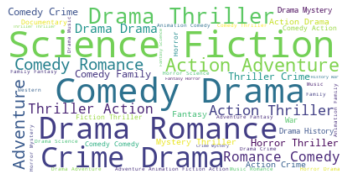

In [37]:
text = ' '.join([i for i in list_of_genres])

wordcloud = WordCloud(max_font_size=90, max_words=100,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Shows that Science Fiction, Comedy and Drama are the more popular genres

In [38]:
from collections import Counter

counter_genre=Counter([j for j in list_of_genres]).most_common(10)
counter_genre

[('Drama', 405),
 ('Comedy', 372),
 ('Drama;Romance', 204),
 ('Comedy;Romance', 175),
 ('Comedy;Drama', 154),
 ('Comedy;Drama;Romance', 137),
 ('Horror;Thriller', 115),
 ('Drama;Thriller', 83),
 ('Horror', 79),
 ('Documentary', 76)]

In [39]:
list_of_production_companies = complete.production_companies

In [40]:
vect = CountVectorizer()
vect.fit(list_of_production_companies)
bag_of_words = vect.transform(list_of_production_companies)
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())

,10,100,1000,101,1019,10th,11,111,114,12,...,écran,éditions,éireann,émile,étoile,étrangères,île,ópalo,österreichischer,вольга
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


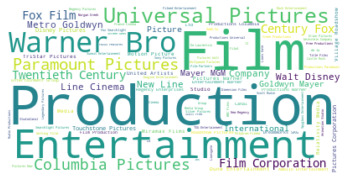

In [41]:
text = ' '.join([i for i in list_of_production_companies])

wordcloud = WordCloud(max_font_size=90, max_words=100,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Shows Warner Bro's, Production Entertainment among the most popular production companies

In [42]:
counter_production_comapnies=Counter([i for i in list_of_production_companies]).most_common(10)
counter_production_comapnies

[('', 163),
 ('Paramount Pictures', 117),
 ('Universal Pictures', 82),
 ('Warner Bros.', 71),
 ('Metro-Goldwyn-Mayer (MGM)', 63),
 ('Twentieth Century Fox Film Corporation', 54),
 ('Columbia Pictures', 50),
 ('New Line Cinema', 42),
 ('Touchstone Pictures', 34),
 ('Walt Disney Pictures', 27)]

In [43]:
list_of_Keywords = complete.Keywords

In [44]:
vect = CountVectorizer()
vect.fit(list_of_Keywords)
bag_of_words = vect.transform(list_of_Keywords)
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())

,11,1500s,15th,16th,17th,18th,1905,1910s,1917,1920s,...,àâ,áªùâú,âçßâ,äìmexico,èú,ïëç,òverste,öá,üer,œìœ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


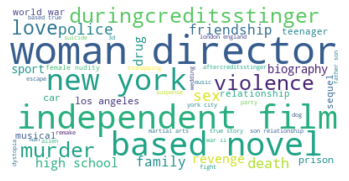

In [45]:
text = ' '.join([i for i in list_of_Keywords])

wordcloud = WordCloud(max_font_size=90, max_words=50,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Shows that movies having keywords like independent film, woman director and based on novel are more popular

In [46]:
Counter([i for i in list_of_Keywords]).most_common(10)

[('', 311),
 ('independent film', 33),
 ('woman director', 23),
 ('duringcreditsstinger', 12),
 ('independent film;woman director', 7),
 ('suspense', 6),
 ('sport', 6),
 ('musical', 5),
 ('dystopia', 4),
 ('aftercreditsstinger', 4)]

In [49]:
overview_text =" ".join(complete.overview)
print ("There are {} words in the combination of all review.".format(len(overview_text)))

There are 1802482 words in the combination of all review.


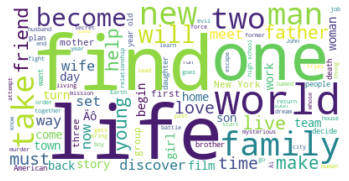

In [50]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_font_size=90, max_words=100, background_color="white").generate(overview_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Topic Mining of Overview column using Latent Dirichlet Allocation (LDA)

In [67]:
vect_overview = CountVectorizer(stop_words='english')
X = vect_overview.fit_transform(complete.overview)
X

<5937x23257 sparse matrix of type '<class 'numpy.int64'>'
	with 154495 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

In [70]:
# Set n to your desired number of tokens 
n = 8
# Get features (tokens) from CountVectorizer
feature_names = np.array(vect_overview.get_feature_names())
# Find top n tokens
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['life', 'young', 'new', 'film', 'family', 'old', 'world', 'lives'],
 1: ['life', 'war', 'man', 'story', 'young', 'new', 'time', 'film'],
 2: ['world', 'group', 'earth', 'man', 'mission', 'young', 'war', 'team'],
 3: ['new', 'life', 'father', 'man', 'family', 'young', 'school', 'love'],
 4: ['life', 'world', 'new', 'story', 'film', 'love', 'town', 'help']}

In [75]:
# Increasing the number of topics to 20 
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect_overview.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

In [64]:
# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect_overview.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

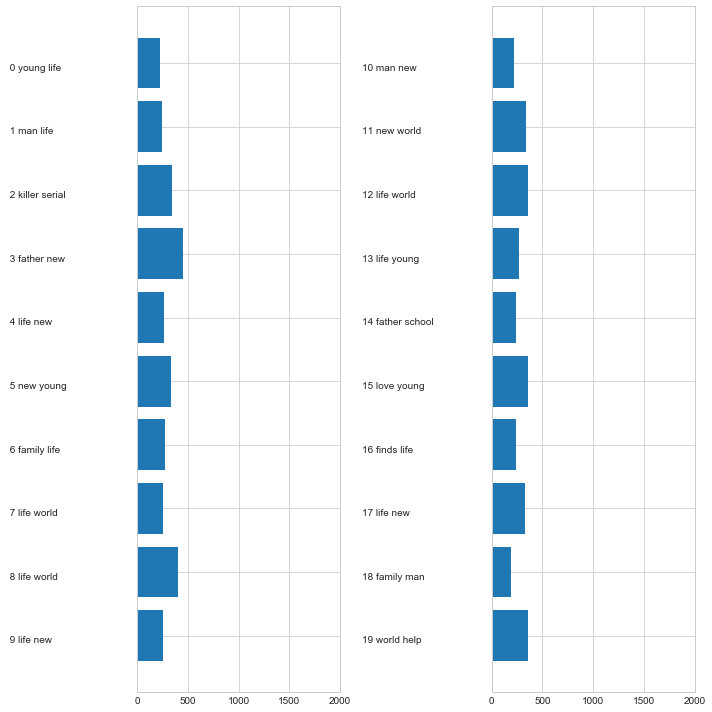

In [76]:
# Let's visualize the result
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

In [77]:
complete.shape

(5937, 22)

In [81]:
complete = pd.get_dummies(complete, columns=['status','cast', 'crew','genres','original_language','production_countries','spoken_languages'])

In [82]:
complete.shape

(5937, 2516)

In [83]:
complete.columns

Index(['id', 'belongs_to_collection', 'budget', 'imdb_id', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'release_date',
       ...
       'spoken_languages_普通话;广州话 / 廣州話;English',
       'spoken_languages_普通话;日本語;广州话 / 廣州話', 'spoken_languages_한국어/조선말',
       'spoken_languages_한국어/조선말;English',
       'spoken_languages_한국어/조선말;English;Español;日本語;Deutsch;Français',
       'spoken_languages_한국어/조선말;English;Français;Türkçe;普通话;广州话 / 廣州話',
       'spoken_languages_한국어/조선말;广州话 / 廣州話;English;普通话;日本語',
       'status_Post Production', 'status_Released', 'status_Rumored'],
      dtype='object', length=2516)

In [85]:
complete = complete.drop(['imdb_id', 'poster_path', 'release_date','belongs_to_collection','original_title',
                         'overview','tagline','title','Keywords','production_companies','release_date'], axis=1)

In [87]:
#Dividing Full data back to train and test depending on if the 'Revenue' column existed or not

flag1 = complete.revenue >= 0
train = complete[flag1]
flag2 = complete.revenue < 0
test = complete[flag2]

In [88]:
print(test.shape, train.shape, complete.shape)

(3534, 2506) (2403, 2506) (5937, 2506)


In [89]:
test = test.drop(['revenue'], axis = 1)

In [90]:
print(test.shape, train.shape, complete.shape)

(3534, 2505) (2403, 2506) (5937, 2506)


In [92]:
#Setting dependent and independent variables
X = train.drop('revenue', axis=1)
X.shape

y = train.loc[:,'revenue']
y.shape



(2403,)

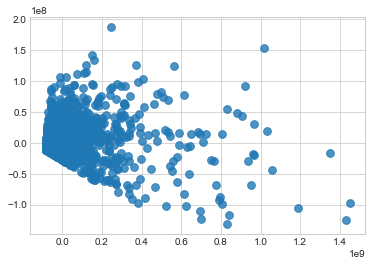

In [123]:
from sklearn.decomposition import PCA
rpca_2c = PCA(svd_solver='randomized', n_components=5)
X = rpca_2c.fit_transform(train.iloc[:,:-1])

plt.scatter(projection[:,0], projection[:,1], alpha=0.8, s=60, marker='o');

In [124]:
projection.shape

(2403, 2)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [127]:
# Step 4
model.fit(X_train, y_train)
# Step 5
y_test_hat = model.predict(X_test)
y_test_hat

array([1.47150670e+07, 1.79537780e+07, 6.44378470e+07, 1.09449237e+08,
       6.67342200e+06, 1.76070171e+08, 8.03400000e+03, 2.95417900e+07,
       1.14178613e+08, 1.21734700e+07, 1.85524600e+07, 1.03911669e+08,
       6.02731730e+07, 1.77238796e+08, 7.19968000e+05, 1.31016720e+07,
       7.57816420e+07, 1.42337240e+08, 5.58000000e+05, 4.08554190e+07,
       3.20000000e+06, 2.68426634e+08, 1.10000000e+06, 1.72538100e+06,
       2.50000000e+06, 2.86417760e+07, 1.68295450e+07, 1.00169340e+07,
       9.46330000e+04, 2.05366737e+08, 3.73552094e+08, 1.14956699e+08,
       2.26785550e+07, 2.18885980e+07, 1.02617000e+05, 2.29542300e+06,
       2.39894000e+05, 1.30000000e+06, 4.46946000e+06, 2.96000000e+08,
       1.86053725e+08, 5.21311860e+08, 1.00020092e+08, 6.81062450e+07,
       1.00525432e+08, 8.01541400e+07, 6.89209800e+06, 2.21794300e+07,
       3.04111830e+07, 3.56296601e+08, 2.05494100e+06, 3.54311130e+07,
       7.54935000e+05, 5.04513070e+07, 8.05478660e+07, 6.66045000e+05,
      

In [129]:
# R2 for training set
Rsquared_train = model.score(X_train, y_train)
print("Rsquared Train Data is {}".format(Rsquared_train))
# R2 for testing set
Rsquared_test = model.score(X_test, y_test)
print("Rsquared Test Data {}".format(Rsquared_test))

Rsquared Train Data is 1.0
Rsquared Test Data 1.0


In [131]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

Decision_Tree_Model = DecisionTreeClassifier()
Decision_Tree_Model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
y_train_hat = Decision_Tree_Model.predict(X_train)
y_train_hat
y_test_hat = Decision_Tree_Model.predict(X_test)
y_test_hat

array([ 17300889,  96889998,   8212430, ...,   4215859,  30127963,
       347434178], dtype=int64)